# Homework 5: Convolution Networks, Non-Linear Regression, Model Tuning and Tree Regression

In [ ]:
# Author Name: Romi Lifshitz

# With guidance from course textbook: Machine Learning Refined
# Instructions can be found in the HW4_Instructions.pdf file on git

# Exercise 1 - Convolution Networks: Vertical and Horizontal Art

## 1.1, 1.2 - Generating Bars and Stripes Image Datasets

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [16]:
def generate_stripe_image(size, stripe_nr, vertical = True):
    img=np.zeros((size,size,1),dtype="uint8")
    for i in range(0,stripe_nr):
        x,y = np.random.randint(0,size,2)
        l  = np.int(np.random.randint(y,size,1))
        if (vertical):
            img[y:l,x,0]=255 # make vertical striped images
        else:
            img[x,y:l,0]=255 # make horizontal striped images
    return img  

In [17]:
# Generating training and testing images
vertical_train = [generate_stripe_image(50,10, vertical=True) for i in range(500)]
horizontal_train = [generate_stripe_image(50,10, vertical=False) for i in range(500)]
X_train = vertical_train + horizontal_train


vertical_val = [generate_stripe_image(50, 10, vertical=True) for i in range(500)]
horizontal_val = [generate_stripe_image(50, 10, vertical=False) for i in range(500)]
X_val = vertical_val + horizontal_val

# Normalizing the two sets
X_train = np.array(X_train) / 255.0
X_val = np.array(X_val) / 255.0

In [18]:
## Double checking training and testing sets generated properly.

# plt.imshow(X_train[0][:,:,0],cmap='gray')
# plt.imshow(X_train[499][:,:,0],cmap='gray')
# plt.imshow(X_train[500][:,:,0],cmap='gray')
# plt.imshow(X_train[999][:,:,0],cmap='gray')

# plt.imshow(X_val[0][:, :, 0], cmap='gray')
# plt.imshow(X_val[499][:, :, 0], cmap='gray')
# plt.imshow(X_val[500][:, :, 0], cmap='gray')
# plt.imshow(X_val[999][:, :, 0], cmap='gray')

In [19]:
# Creating training and testing labels 
# (vertical: 0, horizontal: 1)

Y_train_v = [[0] for i in range(500)]
Y_train_h = [[1] for i in range(500)]
Y_train = np.array(Y_train_v + Y_train_h)

Y_val_v = [[0] for i in range(500)]
Y_val_h = [[1] for i in range(500)]
Y_val = np.array(Y_val_v + Y_val_h)

In [20]:
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(1000, 50, 50, 1)
(1000, 50, 50, 1)
(1000, 1)
(1000, 1)


## 1.3 - Building a CNN Using One-Hot Encoding

In [21]:
# Convert to one hot encoding
Y_train = tf.keras.utils.to_categorical(Y_train, 2)
Y_val = tf.keras.utils.to_categorical(Y_val, 2)

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=1, kernel_size=5, activation='linear', padding="SAME", input_shape=[50,50,1]),
    tf.keras.layers.MaxPooling2D(pool_size=50),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=2, activation='softmax'),])

In [23]:
model.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 1)         26        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 1)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


**Question: How many parameters are in this model?**
<br/>**Response:** Overall, there are 30 parameters that are being optimized in the CNN above.

## 1.4 - Training the Model and Visualizing Performance Metrics

In [25]:
history=model.fit(X_train, Y_train,
                  validation_data=(X_val,Y_val),
                  batch_size=64, 
                  epochs=50,
                  verbose=1,
                  shuffle=True) 

Train on 1000 samples, validate on 1000 samples
Epoch 1/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.7392 - accuracy: 0.5000 - val_loss: 0.7280 - val_accuracy: 0.5000
Epoch 2/50
1000/1000 [==============================] - 1s 638us/sample - loss: 0.7167 - accuracy: 0.5000 - val_loss: 0.7071 - val_accuracy: 0.5000
Epoch 3/50
1000/1000 [==============================] - 1s 591us/sample - loss: 0.6970 - accuracy: 0.5000 - val_loss: 0.6890 - val_accuracy: 0.5000
Epoch 4/50
1000/1000 [==============================] - 1s 610us/sample - loss: 0.6808 - accuracy: 0.5000 - val_loss: 0.6735 - val_accuracy: 0.5000
Epoch 5/50
1000/1000 [==============================] - 1s 635us/sample - loss: 0.6669 - accuracy: 0.5000 - val_loss: 0.6598 - val_accuracy: 0.5000
Epoch 6/50
1000/1000 [==============================] - 1s 623us/sample - loss: 0.6539 - accuracy: 0.5000 - val_loss: 0.6464 - val_accuracy: 0.5000
Epoch 7/50
1000/1000 [==============================] - 1s 608us/s

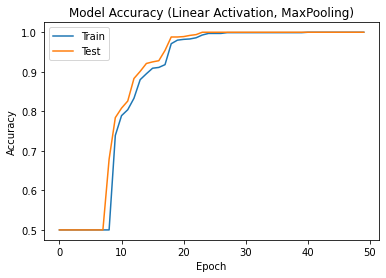

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy \n(Linear Activation, MaxPooling, Kernel Size = 5)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

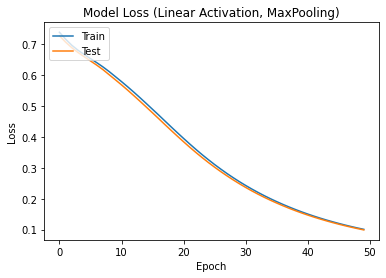

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss \n(Linear Activation, MaxPooling, Kernel Size = 5)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [28]:
train_loss, train_acc = model.evaluate(X_train,  Y_train, verbose=2)
print('Train loss:', train_loss)
print('Train accuracy:', train_acc)
print()
test_loss, test_acc = model.evaluate(X_val,  Y_val, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

1000/1 - 0s - loss: 0.0743 - accuracy: 1.0000
Train loss: 0.09850253742933274
Train accuracy: 1.0

1000/1 - 0s - loss: 0.0746 - accuracy: 1.0000
Test loss: 0.09894450515508652
Test accuracy: 1.0


## 1.5 - Getting the Optimized Kernel

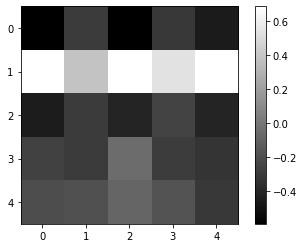

In [29]:
conv_filter=model.get_weights()[0]
plt.imshow(conv_filter[:,:,0],cmap='gray')
plt.colorbar()

**Question: Comment on the
visual appearance of the kernel. Does it seem reasonable that it is capable of distinguishing
between horizonal and vertical stripes. Explain.** <br/> **Response:** First, we can see that the kernel contains mostly negative or near-zero values, except for a horizontal line of close-to-1 values in the second row. Given this appearance and our knowledge of the convolution operation, it seems reasonable that the kernel is capable of distinguishing between horizontal and vertical stripes. Specifically, let's say the kernel is applied to a patch of 5x5 pixels that contains a horizontal line only in the second row of the patch (second row pixels equal 255, others equal 0). Then, the output of applying the filter to the image will be a high positive number (the 255 values are multiplied by near-1 values, others are 0). Conversely, when applying the filter to a patch of pixels containing a vertical line, then the output of the convolution operation would yield a small value-likely negative. This is because all of the 255 pixels in column (except one) will be multiplied by near-zero or negative values. Thus, the kernel outputs high values for images with horizontal lines and low values for images with vertical lines.

Note that our horizontal line example above delt with patches of pixels whose second row was filled with 255 values, but this  will not always be the case (the third row can be white instead of the second, etc.). However, our explanation generalizes since the kernel 'slides' over the image and will eventually align perfectly with the horizontal white row.

## 1.6 - Experiment with your Network

### Modification 1: ReLU instead of Linear Activation

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=1, kernel_size=5, activation='relu', padding="SAME", input_shape=[50,50,1]),
    tf.keras.layers.MaxPooling2D(pool_size=50),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=2, activation='softmax'),
])

In [31]:
model.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 50, 50, 1)         26        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 1)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 4         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [33]:
history=model.fit(X_train, Y_train,
                  validation_data=(X_val,Y_val),
                  batch_size=64, 
                  epochs=50,
                  verbose=1,
                  shuffle=True) 

Train on 1000 samples, validate on 1000 samples
Epoch 1/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6881 - val_accuracy: 0.5000
Epoch 2/50
1000/1000 [==============================] - 1s 751us/sample - loss: 0.6861 - accuracy: 0.5000 - val_loss: 0.6821 - val_accuracy: 0.5000
Epoch 3/50
1000/1000 [==============================] - 1s 752us/sample - loss: 0.6799 - accuracy: 0.5000 - val_loss: 0.6756 - val_accuracy: 0.5000
Epoch 4/50
1000/1000 [==============================] - 1s 737us/sample - loss: 0.6726 - accuracy: 0.5000 - val_loss: 0.6673 - val_accuracy: 0.5000
Epoch 5/50
1000/1000 [==============================] - 1s 721us/sample - loss: 0.6632 - accuracy: 0.5000 - val_loss: 0.6562 - val_accuracy: 0.5000
Epoch 6/50
1000/1000 [==============================] - 1s 732us/sample - loss: 0.6509 - accuracy: 0.5000 - val_loss: 0.6426 - val_accuracy: 0.5000
Epoch 7/50
1000/1000 [==============================] - 1s 712us/s

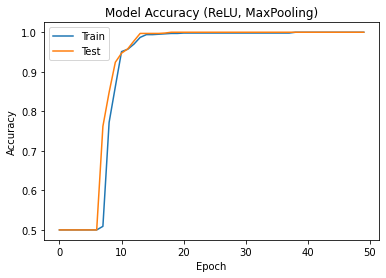

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy \n(ReLU Activation, MaxPooling, Kernel Size = 5)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

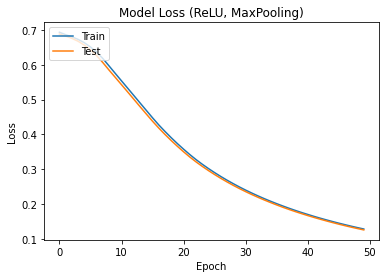

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss \n(ReLU Activation, MaxPooling, Kernel Size = 5)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [37]:
train_loss, train_acc = model.evaluate(X_train,  Y_train, verbose=2)
print('Train loss:', train_loss)
print('Train accuracy:', train_acc)
print()
test_loss, test_acc = model.evaluate(X_val,  Y_val, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

1000/1 - 0s - loss: 0.0837 - accuracy: 1.0000
Train loss: 0.12611668774485588
Train accuracy: 1.0

1000/1 - 0s - loss: 0.0834 - accuracy: 1.0000
Test loss: 0.12557757422327995
Test accuracy: 1.0


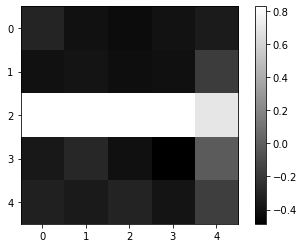

In [38]:
conv_filter=model.get_weights()[0]
plt.imshow(conv_filter[:,:,0],cmap='gray')
plt.colorbar()

<br/>*The changes in the current model include: Linear Activation --> ReLU Activation.
<br/>All other model conditions are kept the same as the first model from exercise 1.5.*
<br/><br/>**Accuracy:** The model has the same accuracy as linear activation (1.0). But the test loss is lower than the train loss when using relu compared to linear activation (just by a little), suggesting that using relu during training produced a slightly more generalizable model than when using linear activation. 
<br/> **Kernel:** The kernel is much better at distinguishing between horizontal and vertical lines than in exercise 1.5, since there are more pixels that are fully white and fully black. As per the description of kernels above, this new kernel would generate higher values when aligned with horizontal lines than the old kernel in 1.5. This new kernel would also generate lower values when aligned with the vertical lines than the old kernel in 1.5. Thus, there is a larger difference between the outputs of kernels that are applied to horizontal lines and kernels that are applied to vertical lines–meaning that the kernel emphasizes the difference between the features much more.

### Modification 2: Average Pooling instead of Max Pooling

In [51]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=1, kernel_size=5, activation='linear', padding="SAME", input_shape=[50,50,1]),
    tf.keras.layers.AveragePooling2D(pool_size=50),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=2, activation='softmax'),
])

In [52]:
model.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 50, 50, 1)         26        
_________________________________________________________________
average_pooling2d_2 (Average (None, 1, 1, 1)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 4         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [54]:
history=model.fit(X_train, Y_train,
                  validation_data=(X_val,Y_val),
                  batch_size=64, 
                  epochs=50,
                  verbose=1,
                  shuffle=True) 

Train on 1000 samples, validate on 1000 samples
Epoch 1/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6932 - accuracy: 0.4930 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/50
1000/1000 [==============================] - 1s 614us/sample - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4810
Epoch 3/50
1000/1000 [==============================] - 1s 608us/sample - loss: 0.6932 - accuracy: 0.4990 - val_loss: 0.6932 - val_accuracy: 0.4960
Epoch 4/50
1000/1000 [==============================] - 1s 595us/sample - loss: 0.6932 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.4940
Epoch 5/50
1000/1000 [==============================] - 1s 588us/sample - loss: 0.6932 - accuracy: 0.4890 - val_loss: 0.6932 - val_accuracy: 0.4880
Epoch 6/50
1000/1000 [==============================] - 1s 577us/sample - loss: 0.6932 - accuracy: 0.4890 - val_loss: 0.6932 - val_accuracy: 0.5020
Epoch 7/50
1000/1000 [==============================] - 1s 592us/s

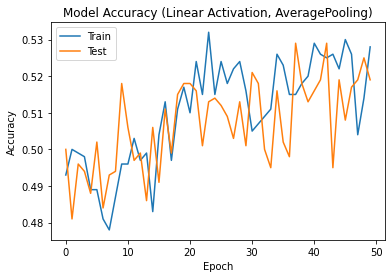

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy \n(Linear Activation, AveragePooling, Kernel Size = 5)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

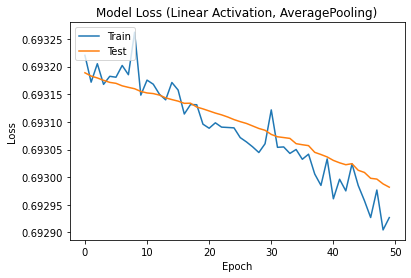

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss \n(Linear Activation, AveragePooling, Kernel Size = 5)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [61]:
train_loss, train_acc = model.evaluate(X_train,  Y_train, verbose=2)
print('Train loss:', train_loss)
print('Train accuracy:', train_acc)
print()
test_loss, test_acc = model.evaluate(X_val,  Y_val, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

1000/1 - 0s - loss: 0.6921 - accuracy: 0.5310
Train loss: 0.6928762664794922
Train accuracy: 0.531

1000/1 - 0s - loss: 0.6935 - accuracy: 0.5190
Test loss: 0.6929818258285523
Test accuracy: 0.519


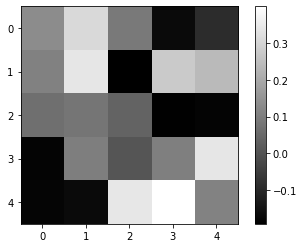

In [62]:
conv_filter=model.get_weights()[0]
plt.imshow(conv_filter[:,:,0],cmap='gray')
plt.colorbar()

<br/>*The changes in the current model include: MaxPooling --> AveragePooling.
<br/>All other model conditions are kept the same as the first model from exercise 1.5.*
<br/><br/>**Accuracy:** The model has a much lower accuracy when using average pooling compared to maxpooling, and the test accuracy is lower than the train accuracy as well. This suggests that average pooling produces a much less accurate model that is less generalizable (is overfitted) than when using maxpooling. It is therefore more favourable to use maxpooling for this data, when combined with linear activation.
<br/> **Kernel:** The kernel appears to be worse at identifying horizontal and vertical lines since it lacks structure and seems to not extract any useful features from the image. Thus, the outputs for horizontal and vertical line images will likely be similar and the outputs will be seemingly random (i.e., ~50% accuracy). So, the kernel won't be able to distinguish between the images well.

### Modification 3: Different Kernel Size (10)

In [63]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=1, kernel_size=10, activation='linear', padding="SAME", input_shape=[50,50,1]),
    tf.keras.layers.MaxPooling2D(pool_size=50),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=2, activation='softmax'),
])

In [64]:
model.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 50, 50, 1)         101       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 1)           0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 4         
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [66]:
history=model.fit(X_train, Y_train,
                  validation_data=(X_val,Y_val),
                  batch_size=64, 
                  epochs=50,
                  verbose=1,
                  shuffle=True) 

Train on 1000 samples, validate on 1000 samples
Epoch 1/50
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.6922 - accuracy: 0.5000 - val_loss: 0.6861 - val_accuracy: 0.5000
Epoch 2/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6806 - accuracy: 0.5000 - val_loss: 0.6738 - val_accuracy: 0.5000
Epoch 3/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6668 - accuracy: 0.5000 - val_loss: 0.6583 - val_accuracy: 0.5000
Epoch 4/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6496 - accuracy: 0.5000 - val_loss: 0.6386 - val_accuracy: 0.5000
Epoch 5/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6282 - accuracy: 0.5000 - val_loss: 0.6154 - val_accuracy: 0.5040
Epoch 6/50
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6027 - accuracy: 0.5190 - val_loss: 0.5882 - val_accuracy: 0.5570
Epoch 7/50
1000/1000 [==============================] - 1s 1ms/sample - loss

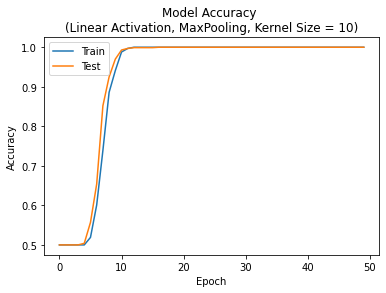

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy \n(Linear Activation, MaxPooling, Kernel Size = 10)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

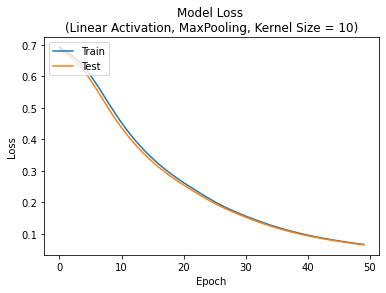

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss \n(Linear Activation, MaxPooling, Kernel Size = 10)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [72]:
train_loss, train_acc = model.evaluate(X_train,  Y_train, verbose=2)
print('Train loss:', train_loss)
print('Train accuracy:', train_acc)
print()
test_loss, test_acc = model.evaluate(X_val,  Y_val, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

1000/1 - 0s - loss: 0.0917 - accuracy: 1.0000
Train loss: 0.06545362088084221
Train accuracy: 1.0

1000/1 - 0s - loss: 0.1065 - accuracy: 1.0000
Test loss: 0.06542047701776027
Test accuracy: 1.0


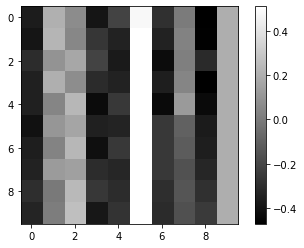

In [73]:
conv_filter=model.get_weights()[0]
plt.imshow(conv_filter[:,:,0],cmap='gray')
plt.colorbar()

<br/>*The changes in the current model include: Kernel Size = 3 --> Kernel Size = 10.
<br/>All other model conditions are kept the same as the first model in exercise 1.5.*
<br/><br/>**Accuracy:** The accuracy is still very good (1.0), akin to that of exercise 1.5 and modification 1. The loss is the lowest out of all the models so far. These outcomes indicate that the model can distinguish between horizontal and vertical lines very well. Additionally, the test and train loss are almost the same, indicating that this is generalizable to new data.
<br/> **Kernel:** The kernel is much more precise than any of the previous ones–since it is 10x10, it has more pixels to detect features and can detect smaller differences. The kernel is able to distinguish between horizontal and vertical lines well, as per prior explanations. This suggests that an increase in kernel size improved this model. There are also many more parameters than the other models (105) as a result of larger kernels being optimized, which is another possible explanation for the improvements observed.

# Exercise 2 - Non-Linear Regression

In [25]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt

csvname = 'multiple_sine_waves.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:2,:]
y = data[2:,:]

In [26]:
def feature_transforms(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return np.sin(a).T

def model(x,w):    
    # feature transformation 
#     print(w[0])
    f = feature_transforms(x,w[0])
    
    # compute linear combination and return
    a = w[1][0] + np.dot(f.T,w[1][1:])
    return a.T

In [27]:
# Define the cost function
def least_squares(w):
    P = float(y.shape[1])
    cost = np.sum((model(x,w) - y) ** 2)
    return cost / P

In [28]:
# gradient descent function - inputs: g (input function), 
# alpha (steplength parameter), 
# max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w]     # container for weight history
    cost_history = [g(w)]    # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient, store current weights and cost function value
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval

        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

In [29]:
g=least_squares; alpha=10**(0); max_its=2000; w=np.array([np.random.randn(3,2),np.random.randn(3,2)])
w_history, c_history = gradient_descent(g,alpha,max_its,w)

In [30]:
i = np.argmin(c_history)
w_star = w_history[i]
print("The optimal weight parameters are: \n", w_star)

The optimal weight parameters are: 
 [[[10.06178893 10.00378723]
  [ 7.32240987  6.62784076]
  [ 4.54485461  5.27689589]]

 [[-1.44845004 -0.44168225]
  [ 0.35706706  0.79214282]
  [-0.56293753  0.25468069]]]


Text(0.5, 1.0, 'Cost Function History for Non-Linear Regression Optimization')

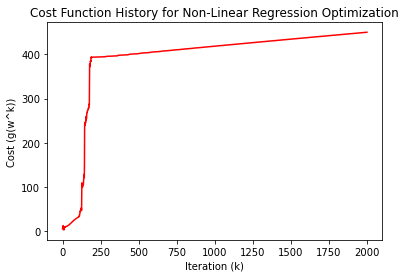

In [32]:
plt.plot(np.linspace(0,len(c_history),len(c_history)), c_history, color='r', label='beta = 0')
plt.xlabel('Iteration (k)')
plt.ylabel('Cost (g(w^k))')
plt.title('Cost Function History for Non-Linear Regression Optimization')

# Exercise 3 - Model Tuning

## 3.1 - Testing different step lengths in MNIST

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

alpha = 1.0
model_1 = keras.Sequential([
  layers.Dense(512, activation='relu'),
  layers.Dense(10, activation='softmax')
])
model_1.compile(optimizer=keras.optimizers.RMSprop(alpha),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_1 =model_1.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

alpha = 0.5
model_05 = keras.Sequential([
  layers.Dense(512, activation='relu'),
  layers.Dense(10, activation='softmax')
])
model_05.compile(optimizer=keras.optimizers.RMSprop(alpha),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_05 =model_05.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

alpha = 0.1
model_01 = keras.Sequential([
  layers.Dense(512, activation='relu'),
  layers.Dense(10, activation='softmax')
])
model_01.compile(optimizer=keras.optimizers.RMSprop(alpha),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_01 =model_01.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

alpha = 0.01
model_001 = keras.Sequential([
  layers.Dense(512, activation='relu'),
  layers.Dense(10, activation='softmax')
])
model_001.compile(optimizer=keras.optimizers.RMSprop(alpha),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_001 =model_001.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

alpha = 0.001
model_0001 = keras.Sequential([
  layers.Dense(512, activation='relu'),
  layers.Dense(10, activation='softmax')
])
model_0001.compile(optimizer=keras.optimizers.RMSprop(alpha),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_0001 =model_0001.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 88us/sample - loss: 963.8651 - accuracy: 0.4328 - val_loss: 3.4739 - val_accuracy: 0.3174
Epoch 2/10
48000/48000 [==============================] - 3s 71us/sample - loss: 5.2814 - accuracy: 0.2693 - val_loss: 2.3535 - val_accuracy: 0.2455
Epoch 3/10
48000/48000 [==============================] - 3s 72us/sample - loss: 3.6394 - accuracy: 0.2614 - val_loss: 2.1447 - val_accuracy: 0.2267
Epoch 4/10
48000/48000 [==============================] - 3s 72us/sample - loss: 2.6549 - accuracy: 0.2546 - val_loss: 2.6333 - val_accuracy: 0.2475
Epoch 5/10
48000/48000 [==============================] - 4s 74us/sample - loss: 2.6531 - accuracy: 0.2654 - val_loss: 3.2826 - val_accuracy: 0.3027
Epoch 6/10
48000/48000 [==============================] - 4s 75us/sample - loss: 2.7326 - accuracy: 0.2850 - val_loss: 2.2479 - val_accuracy: 0.2716
Epoch 7/10
48000/48000 [==============================

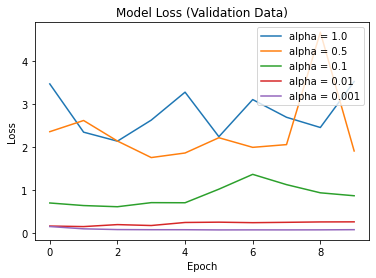

In [5]:
plt.plot(history_1.history['val_loss'], label="alpha = 1.0")
plt.plot(history_05.history['val_loss'], label="alpha = 0.5")
plt.plot(history_01.history['val_loss'], label="alpha = 0.1")
plt.plot(history_001.history['val_loss'], label="alpha = 0.01")
plt.plot(history_0001.history['val_loss'], label="alpha = 0.001")
plt.title('Model Loss (Validation Data)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

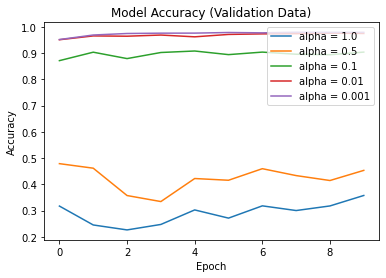

In [6]:
plt.plot(history_1.history['val_accuracy'], label="alpha = 1.0")
plt.plot(history_05.history['val_accuracy'], label="alpha = 0.5")
plt.plot(history_01.history['val_accuracy'], label="alpha = 0.1")
plt.plot(history_001.history['val_accuracy'], label="alpha = 0.01")
plt.plot(history_0001.history['val_accuracy'], label="alpha = 0.001")
plt.title('Model Accuracy (Validation Data)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

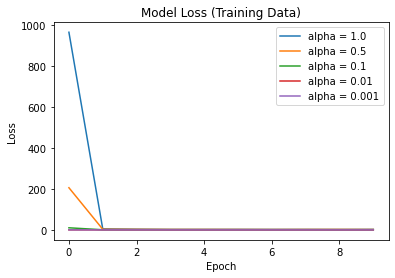

In [7]:
plt.plot(history_1.history['loss'], label="alpha = 1.0")
plt.plot(history_05.history['loss'], label="alpha = 0.5")
plt.plot(history_01.history['loss'], label="alpha = 0.1")
plt.plot(history_001.history['loss'], label="alpha = 0.01")
plt.plot(history_0001.history['loss'], label="alpha = 0.001")
plt.title('Model Loss (Training Data)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

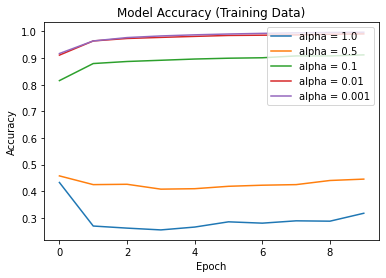

In [8]:
plt.plot(history_1.history['accuracy'], label="alpha = 1.0")
plt.plot(history_05.history['accuracy'], label="alpha = 0.5")
plt.plot(history_01.history['accuracy'], label="alpha = 0.1")
plt.plot(history_001.history['accuracy'], label="alpha = 0.01")
plt.plot(history_0001.history['accuracy'], label="alpha = 0.001")
plt.title('Model Accuracy (Training Data)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

In [9]:
print("Training Data Metrics")
print('alpha 1.0')
train_loss, train_acc = model_1.evaluate(train_images,  train_labels, verbose=2)
print()

print('alpha 0.5')
train_loss, train_acc = model_05.evaluate(train_images,  train_labels, verbose=2)
print()

print('alpha 0.1')
train_loss, train_acc = model_01.evaluate(train_images,  train_labels, verbose=2)
print()

print('alpha 0.01')
train_loss, train_acc = model_001.evaluate(train_images,  train_labels, verbose=2)
print()

print('alpha 0.001')
train_loss, train_acc = model_0001.evaluate(train_images,  train_labels, verbose=2)
print()

Training Data Metrics
alpha 1.0
60000/1 - 3s - loss: 2.2612 - accuracy: 0.3487

alpha 0.5
60000/1 - 3s - loss: 1.5170 - accuracy: 0.4440

alpha 0.1
60000/1 - 3s - loss: 0.2731 - accuracy: 0.9097

alpha 0.01
60000/1 - 3s - loss: 0.0424 - accuracy: 0.9889

alpha 0.001
60000/1 - 3s - loss: 0.0120 - accuracy: 0.9939



In [14]:
print("Training Data Metrics")
print('alpha 1.0')
print('Accuracy:', history_1.history['val_accuracy'][-1])
print('Loss:', history_1.history['val_loss'][-1])
print()
print('alpha 0.5')
print('Accuracy:', history_05.history['val_accuracy'][-1])
print('Loss:', (history_05.history['val_loss'][-1]))
print()
print('alpha 0.1')
print('Accuracy:', history_01.history['val_accuracy'][-1])
print('Loss:', (history_01.history['val_loss'][-1]))
print()
print('alpha 0.01')
print('Accuracy:', history_001.history['val_accuracy'][-1])
print('Loss:', (history_001.history['val_loss'][-1]))
print()
print('alpha 0.001')
print('Accuracy:', history_0001.history['val_accuracy'][-1])
print('Loss:', (history_0001.history['val_loss'][-1]))
print()

Training Data Metrics
alpha 1.0
Accuracy: 0.35775
Loss: 3.5294276494979857

alpha 0.5
Accuracy: 0.45325
Loss: 1.916403898557027

alpha 0.1
Accuracy: 0.9033333
Loss: 0.8767038471698761

alpha 0.01
Accuracy: 0.97425
Loss: 0.2705365432305618

alpha 0.001
Accuracy: 0.9785
Loss: 0.0888745981445536



**Question: What happens as you decrease the value of alpha? What can you say about the firrst value
of alpha = 1.0 ? Explain your results.**
<br/>**Response:** Similar trends are observed among the training and validation datasets. For both training and validation sets, the alpha that yielded both the highest accuracy and lowest loss was alpha = 0.001, thus it performs the most accurate classification out of all the models tested. As alpha is decreased, we can see that the accuracy increases and the loss decreases. The first value of alpha = 1.0 yielded the lowest accuracy (0.2542 for training, 0.35775 for validation) and highest loss (2.1441 for training, 3.5294 for validation), and thus it is the model that performed the worst out of the five. This is likely because the alpha = 1.0 was too large of a step that it skipped over important minima during RMSProp's gradient descent. As we decreased alpha, the smaller step lengths were able to reach important minima of the cost function.


## 3.2 - MNIST Logistic Regression

In [24]:
model_3_2 = keras.Sequential([layers.Dense(10, activation='softmax')])
model_3_2.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_small_model = model_3_2.fit(
    train_images, train_labels,
    epochs=50,
    batch_size=128,
    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 41us/sample - loss: 0.6713 - accuracy: 0.8354 - val_loss: 0.3618 - val_accuracy: 0.9034
Epoch 2/50
48000/48000 [==============================] - 1s 22us/sample - loss: 0.3515 - accuracy: 0.9033 - val_loss: 0.3081 - val_accuracy: 0.9136
Epoch 3/50
48000/48000 [==============================] - 1s 21us/sample - loss: 0.3155 - accuracy: 0.9129 - val_loss: 0.2905 - val_accuracy: 0.9203
Epoch 4/50
48000/48000 [==============================] - 1s 21us/sample - loss: 0.2991 - accuracy: 0.9167 - val_loss: 0.2815 - val_accuracy: 0.9215
Epoch 5/50
48000/48000 [==============================] - 1s 21us/sample - loss: 0.2895 - accuracy: 0.9191 - val_loss: 0.2755 - val_accuracy: 0.9237
Epoch 6/50
48000/48000 [==============================] - 1s 22us/sample - loss: 0.2832 - accuracy: 0.9206 - val_loss: 0.2715 - val_accuracy: 0.9262
Epoch 7/50
48000/48000 [==============================] 

Text(0.5, 0, 'Epoch')

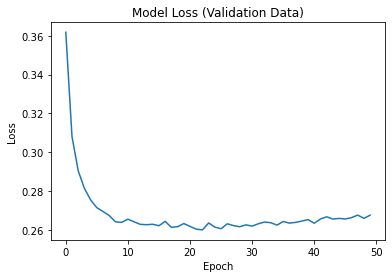

In [26]:
plt.plot(history_small_model.history['val_loss'])
plt.title('Model Loss (Validation Data)')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

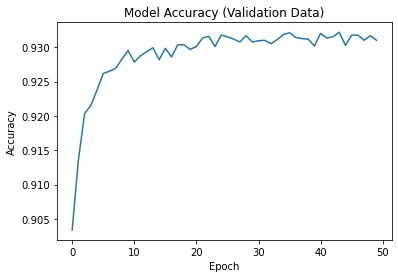

In [28]:
plt.plot(history_small_model.history['val_accuracy'])
plt.title('Model Accuracy (Validation Data)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [39]:
model_3_2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             multiple                  7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


**Question: When do we start overfitting?**
<br/> Response: We start overfitting at around epoch 25 because this is where the val_loss begins to increase.

## 3.3 - Overfitting

In [32]:
model_3_3 = keras.Sequential([
  layers.Dense(96, activation='relu'),
  layers.Dense(96, activation='relu'),
  layers.Dense(10, activation='softmax'),
])
model_3_3.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history_large_model = model_3_3.fit(
    train_images, train_labels,
    epochs=50,
    batch_size=128,
    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 3s 63us/sample - loss: 0.3537 - accuracy: 0.9010 - val_loss: 0.2147 - val_accuracy: 0.9398
Epoch 2/50
48000/48000 [==============================] - 2s 46us/sample - loss: 0.1571 - accuracy: 0.9528 - val_loss: 0.1392 - val_accuracy: 0.9584
Epoch 3/50
48000/48000 [==============================] - 2s 49us/sample - loss: 0.1109 - accuracy: 0.9670 - val_loss: 0.1174 - val_accuracy: 0.9661
Epoch 4/50
48000/48000 [==============================] - 2s 49us/sample - loss: 0.0840 - accuracy: 0.9741 - val_loss: 0.1051 - val_accuracy: 0.9699
Epoch 5/50
48000/48000 [==============================] - 2s 51us/sample - loss: 0.0671 - accuracy: 0.9800 - val_loss: 0.0987 - val_accuracy: 0.9711
Epoch 6/50
48000/48000 [==============================] - 3s 54us/sample - loss: 0.0557 - accuracy: 0.9826 - val_loss: 0.0985 - val_accuracy: 0.9715
Epoch 7/50
48000/48000 [==============================] 

Text(0.5, 0, 'Epoch')

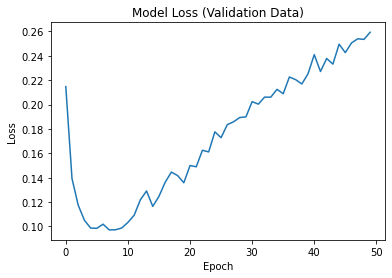

In [34]:
plt.plot(history_large_model.history['val_loss'])
plt.title('Model Loss (Validation Data)')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

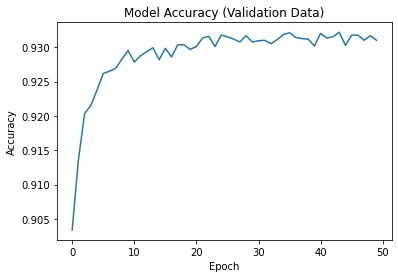

In [35]:
plt.plot(history_small_model.history['val_accuracy'])
plt.title('Model Accuracy (Validation Data)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

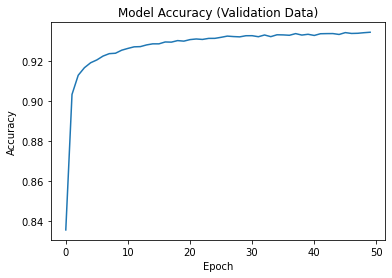

In [41]:
plt.plot(history_small_model.history['accuracy'])
plt.title('Model Accuracy (Validation Data)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [40]:
model_3_3.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             multiple                  75360     
_________________________________________________________________
dense_33 (Dense)             multiple                  9312      
_________________________________________________________________
dense_34 (Dense)             multiple                  970       
Total params: 85,642
Trainable params: 85,642
Non-trainable params: 0
_________________________________________________________________


**Explanation**: Clearly this overfits at the drop at around epoch 5-10. We can see there are way more parameters than in questoin 3.2–because of multiple large dense layers. This means that the model is overspecified to predict the labels of the training data inputs, and will do badly when generalizing to new never-before-seen inputs. Though the accuracy for the validation data is pretty high, it is still much lower than the training accuracy since it overfits. 